In [ ]:
# Banglure house price prediction
import pandas as pd
import numpy as np


In [ ]:
# reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Datasets/Bengaluru_House_Data.csv')

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
import seaborn as sns

In [ ]:
# society has high null value percentage

In [ ]:
# to check the null value sum in 
# data pre-processing steps
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.drop('society',axis=1,inplace=True)


In [ ]:
df.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [ ]:
# here we taking the partiular table mode and fill it with it using fill na methode
df.balcony.mode()

0    2.0
dtype: float64

In [ ]:
df.balcony = df.balcony.fillna(2.0)

In [ ]:
df.bath.mode()

0    2.0
dtype: float64

In [ ]:
df.bath = df.bath.fillna(2.0)

In [ ]:
df['size'].mode()

0    2 BHK
dtype: object

In [ ]:
df.size = df['size'].fillna('2 BHK')

In [ ]:
df.location.mode()

0    Whitefield
dtype: object

In [ ]:
df.location = df.location.fillna('Whitefield')

In [ ]:
# checking the columns in the dataset
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [ ]:
# to check the particular column data types
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# using lambda function
df['bhk'] = df['size'].apply(lambda x:x.split(' ')[0])

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
# while checking the total sqrft column we can see that the particular column contains string data bcz it has range format sting intigers
# so we need to split it or modify that
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [ ]:
def spl(x):
    token = x.split('-')
    if len(token) == 2:
             
            return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None   #if we give x we get other values ex:34sqm we ignore them rightnow
    
        

In [ ]:
df.total_sqft = df.total_sqft.apply(spl)

In [ ]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
len(df[~df.total_sqft.apply(is_float)])

0

In [ ]:
# these are the columns we are ignoring temporarily

In [ ]:
df_new = df[~df.total_sqft.apply(is_float)].head(46)


In [ ]:
df.isna().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      46
bath             0
balcony          0
price            0
bhk              0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13274 non-null  object 
 1   availability  13274 non-null  object 
 2   location      13274 non-null  object 
 3   size          13274 non-null  object 
 4   total_sqft    13274 non-null  float64
 5   bath          13274 non-null  float64
 6   balcony       13274 non-null  float64
 7   price         13274 non-null  float64
 8   bhk           13274 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [ ]:
df = df.drop('availability',axis=1)

In [ ]:
df.bhk = df.bhk.astype(int)

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13274 non-null  object 
 1   location    13274 non-null  object 
 2   size        13274 non-null  object 
 3   total_sqft  13274 non-null  float64
 4   bath        13274 non-null  float64
 5   balcony     13274 non-null  float64
 6   price       13274 non-null  float64
 7   bhk         13274 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 933.3+ KB


In [ ]:
# the main purpose of this function is to detect the outliears
df['price_per_sqft'] = round((df['price'] * 100000 )/(df['total_sqft']),2)

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.00


In [ ]:
a = df.location.value_counts()

In [ ]:
a_top_10 = a.sort_values(ascending=False).head(10)

In [ ]:
a_top_10

Whitefield               539
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           271
Thanisandra              233
Yelahanka                213
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [ ]:
def loc_f(x):
    if x in a_top_10:
        return x
    else:
        return 'other'
    

In [ ]:
df.location = df.location.apply(loc_f)

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,other,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,other,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,other,3 BHK,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,other,2 BHK,1200.0,2.0,1.0,51.00,2,4250.00


In [ ]:
df.location.value_counts()

other                    10608
Whitefield                 539
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             271
Thanisandra                233
Yelahanka                  213
Uttarahalli                186
Hebbal                     177
Marathahalli               175
Raja Rajeshwari Nagar      171
Name: location, dtype: int64

In [ ]:
df.shape

(13274, 9)

In [ ]:
df[df.total_sqft/df.bhk<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.51
45,Plot Area,other,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.33
58,Plot Area,other,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.98
68,Plot Area,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.30
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.00


In [ ]:
df.shape

(13274, 9)

In [ ]:
# tillda function is use to remove simply its a not function
df1 = df[~(df.total_sqft/df.bhk<300)]

In [ ]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,other,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,other,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,other,3 BHK,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,other,2 BHK,1200.0,2.0,1.0,51.00,2,4250.00


In [ ]:
df1.shape

(12530, 9)

In [ ]:
# for outliears removing we defining another function
# using two forloops for priceper sqft and location
a = df1.groupby(df.location)
df1.groupby(df.location)

In [ ]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df1.groupby(df1.location):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <= (m+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [ ]:
df2 = remove_outlier(df1)

In [ ]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City,2 BHK,660.0,1.0,1.0,23.10,2,3500.00
1,Super built-up Area,Electronic City,3 BHK,1025.0,2.0,1.0,47.00,3,4585.37
2,Super built-up Area,Electronic City,2 BHK,1000.0,2.0,1.0,28.88,2,2888.00
3,Super built-up Area,Electronic City,3 BHK,1530.0,2.0,1.0,45.90,3,3000.00
4,Super built-up Area,Electronic City,3 BHK,1500.0,2.0,1.0,64.50,3,4300.00


In [ ]:
# bathrrom and bedroom must be same
df3 = df2[~(df2.bath > (df2.bhk))]

In [ ]:
df3.shape

(10557, 9)

In [ ]:
# to check 20000 above sqrfeet property
len(df3[df3.total_sqft > 20000])

2

In [ ]:
df4 = df3[~(df3.total_sqft > 9000)]

In [ ]:
df4.shape

(10550, 9)

In [ ]:
df5 = df4.drop('price_per_sqft',axis=1)

In [ ]:
df6 = df5.drop(['size'],axis=1)

In [ ]:
df7 = pd.get_dummies(df6,drop_first=True)

In [ ]:
df7.shape

(10550, 18)

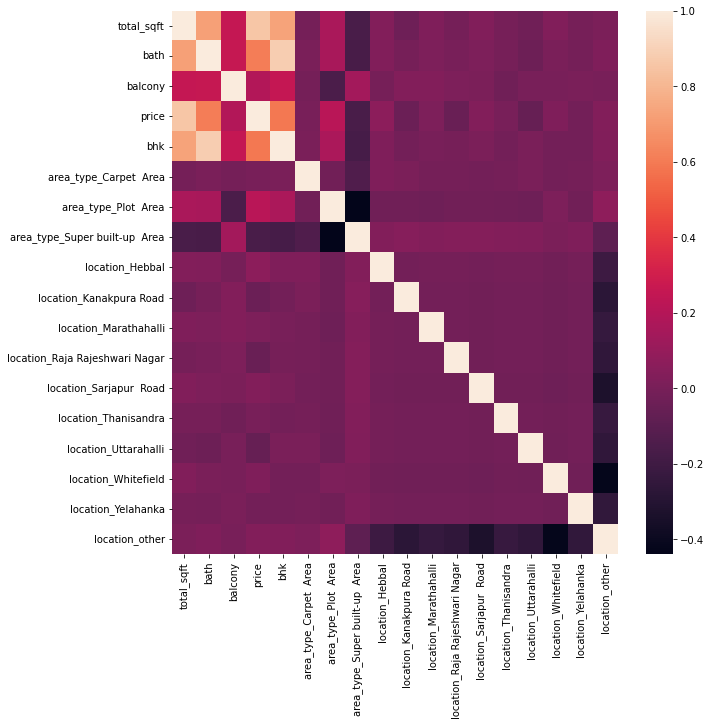

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
a = df7.corr()
sns.heatmap(a)

In [ ]:
# splitting and standardizing the data set
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df7.drop('price',axis=1)
y = df7['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [ ]:
scl = StandardScaler()

X_train_scaled = scl.fit_transform(X_train)

X_test_scales = scl.transform(X_test) 

In [ ]:
# introducing to our models
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_scales)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.7863327828960868

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
reg = AdaBoostRegressor()

In [ ]:
reg.fit(X_train_scaled,y_train)

AdaBoostRegressor()

In [ ]:
y_pred1 = reg.predict(X_test_scales)

In [ ]:
r2_score(y_test,y_pred1)

0.7699946069810342

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
xgb = XGBRFRegressor()

In [ ]:
xgb.fit(X_train_scaled,y_train)

[03:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

In [ ]:
y_pred2 = xgb.predict(X_test_scales)

In [ ]:
r2_score(y_test,y_pred2)

0.7550228389282809

In [ ]:
# now we importing randomforestregressor
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()

In [ ]:
rfc.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
y_pred3 = rfc.predict(X_test_scales)
y_pred3

array([ 73.75365714, 120.71533333,  26.57981667, ...,  54.75726994,
        32.05315952,  46.50774537])

In [ ]:
r2_score(y_test,y_pred3)

0.754643531833715

## CONCULSION
----------------------------
> The best model is 
LINEAR REGRESSION MODEL
IT HAS 78 PERCENT OF ACCURACY